In [1]:
import pandas as pd
import geopandas as gpd
from os import listdir
from os.path import isfile, join
import pathlib
import matplotlib.pyplot as plt


In [2]:
# file paths and names
path_input = '/Users/srilakshmi/Desktop/Thesis/Data/District-level/Totals/'
name_input_file = 'Impacts-Ghana_MaxFlood_20200715_20201014.csv'

path_output = '/Users/srilakshmi/Desktop/Thesis/Treatment-Control-Assignment/Perc-Flooded-NRT/People/'
name_output_file = 'Perc_People_Flooded.csv'


In [3]:
tot_pop = pd.read_csv(path_input+name_input_file, header=0)

colnames = []
for col in tot_pop.columns:
    colnames.append(col)

tot_pop = tot_pop.dropna(subset=[colnames[2]])
tot_pop = tot_pop[[colnames[1], colnames[2], colnames[6]]]
tot_pop = tot_pop.rename(columns={colnames[1]: "Region", colnames[2]: "Total Pop", colnames[6]: "Flooded Pop"})
tot_pop['Perc Population Flooded'] = list(tot_pop['Flooded Pop']/tot_pop['Total Pop'])

tot_pop = tot_pop.drop(columns=['Total Pop', 'Flooded Pop'])
tot_pop = tot_pop.sort_values(by=['Perc Population Flooded'], ascending=False)

tot_pop


,Region,Perc Population Flooded
2,Agona West,0.052515
3,Komenda Edna Eguafo / Abirem,0.035029
7,Gonja Central,0.025552
0,La Dade Kotopon,0.020046
8,Karaga,0.018817
...,...,...
199,Jaman North,0.000000
198,Jaman South,0.000000
197,Dormaa West,0.000000
196,Kadjebi,0.000000


In [4]:
# save file to disk

tot_pop.to_csv(path_output+name_output_file, index = False, header=True)


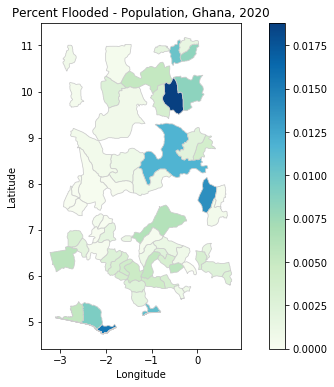

In [5]:
# map using geopandas

shp_path = '/Users/srilakshmi/Desktop/Thesis/Data/District-level/Districts-Shapefile/gadm36_GHA_2.shp'
ghana_dist = gpd.read_file(shp_path)

merged = ghana_dist.set_index('NAME_2').join(tot_pop.set_index('Region'))
merged.index.name = 'NAME_2'
merged.reset_index(inplace=True)

merged = merged.sort_values(by=['Perc Population Flooded'], ascending=False)

# set a variable that will call whatever column we want to visualise on the map
variable = 'Perc Population Flooded'
colorscale = 'GnBu'

# set the range for the choropleth
vmin, vmax = min(merged[variable]), max(merged[variable])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap=colorscale, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Percent Flooded - Population, Ghana, 2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sm = plt.cm.ScalarMappable(cmap=colorscale, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

plt.show()


In [6]:
# write to shapefile
path_output = '/Users/srilakshmi/Desktop/Thesis/Treatment-Control-Assignment/Perc-Flooded-NRT/People/perc_people_flooded_shp/'
name_output_file = 'perc_people_flooded.shp'
merged.to_file(path_output+name_output_file)
